# Data Cleaning and Processing

In this notebook, we will extract the useful variables from the data for building the prediction model in next notebook.

In [1]:
%matplotlib inline
import pickle
import requests
import pandas as pd
import numpy as np
import shelve
import re
import seaborn as sns
import matplotlib.pyplot as plt

First, we import the dataset that provided by [Kaggle Dataset-Can You Predict The Result?](https://www.kaggle.com/lantanacamara/hong-kong-horse-racing)
. The dataset contains the race result of 1561 local races throughout Hong Kong racing seasons 2014-16 and more information will be added into the dataset. Also, we need to download the race result csv file since that csv file contains date informations of all races and we need to use it as one of our variables.

### Import both csv files and merge them by race_id columns

In [2]:
horsedb = pd.read_csv('data/horsedb.csv')
raceresult = pd.read_csv('data/raceresult.csv')
#we need race date, distance and class
horsedf=pd.merge(horsedb,raceresult[['race_id',"race_date","race_distance","race_class"]])

In [3]:
raceresult.head()

,src,race_date,race_course,race_number,race_id,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,20140914-1.html,2014-09-14,Sha Tin,1,2014-001,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,20140914-10.html,2014-09-14,Sha Tin,10,2014-010,Class 2,1400,GOOD TO FIRM,COTTON TREE HANDICAP,"TURF - ""A"" COURSE",13.55 22.25 22.89 22.85,\n SMART MAN was slow to begin....
2,20140914-2.html,2014-09-14,Sha Tin,2,2014-002,Class 5,1200,GOOD TO FIRM,TIM MEI HANDICAP,"TURF - ""A"" COURSE",24.06 22.25 23.66,\n ALLEY-OOP and FLYING KEEPER ...
3,20140914-3.html,2014-09-14,Sha Tin,3,2014-003,Class 1,1200,GOOD TO FIRM,THE HKSAR CHIEF EXECUTIVE'S CUP (HANDICAP),"TURF - ""A"" COURSE",23.42 22.48 22.47,"\n On arrival at the Start, it ..."
4,20140914-4.html,2014-09-14,Sha Tin,4,2014-004,Class 4,1200,GOOD TO FIRM,LUNG WUI HANDICAP,"TURF - ""A"" COURSE",24.00 22.62 22.64,\n Just prior to the start bein...


In [4]:
horsedf.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id,race_date,race_distance,race_class
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001,2014-09-14,1400,Class 5
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,9.0,2.0,1.22.65,8,NaN,NaN,2014-001,2014-09-14,1400,Class 5
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001,2014-09-14,1400,Class 5
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,...,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001,2014-09-14,1400,Class 5
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,...,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001,2014-09-14,1400,Class 5


### Remove the unused columns - running_position , length_behind_winner  
Running positions are indicators of running style of horses, but there are so many missing values of the runnning positions in the dataset. Also, there are so many missing values of the length behind winner column. Therefore we will not use them for the prediction and analysis.
 

In [5]:
horsedf.drop(["running_position_1","running_position_2",
              "running_position_3","running_position_4",
              "running_position_5","running_position_6",
             "length_behind_winner"],axis=1,inplace=True)

In [6]:
horsedf.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,finish_time,win_odds,race_id,race_date,race_distance,race_class
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,1.22.33,3.8,2014-001,2014-09-14,1400,Class 5
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,1.22.65,8,2014-001,2014-09-14,1400,Class 5
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,1.22.66,5.7,2014-001,2014-09-14,1400,Class 5
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,1.22.66,6.1,2014-001,2014-09-14,1400,Class 5
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,1.23.02,6.1,2014-001,2014-09-14,1400,Class 5


In [7]:
horsedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30189 entries, 0 to 30188
Data columns (total 15 columns):
finishing_position       30187 non-null object
horse_number             29851 non-null float64
horse_name               30189 non-null object
horse_id                 30189 non-null object
jockey                   30189 non-null object
trainer                  30189 non-null object
actual_weight            30189 non-null object
declared_horse_weight    30189 non-null object
draw                     30189 non-null object
finish_time              30189 non-null object
win_odds                 30189 non-null object
race_id                  30189 non-null object
race_date                30189 non-null object
race_distance            30189 non-null int64
race_class               30189 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 3.7+ MB


### Remove unused rows and data
Some finishing positions are special incidents, such as,**WV**, **WV-A**, etc. Please refer to this [page](http://www.hkjc.com/English/include/special_race_index.htm) for the descriptions. Thus, we want to remove the finishing positions which are not numbers.
      

In [8]:
horsedf=horsedf[pd.to_numeric(horsedf['finishing_position'], errors='coerce').notnull()]
#Convert some columns to float 
horsedf[['finishing_position','actual_weight','declared_horse_weight','draw',"win_odds"]]= horsedf[['finishing_position','actual_weight','declared_horse_weight','draw',"win_odds"]].astype(float,inplace=True)

In [9]:
horsedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29364 entries, 0 to 30186
Data columns (total 15 columns):
finishing_position       29364 non-null float64
horse_number             29364 non-null float64
horse_name               29364 non-null object
horse_id                 29364 non-null object
jockey                   29364 non-null object
trainer                  29364 non-null object
actual_weight            29364 non-null float64
declared_horse_weight    29364 non-null float64
draw                     29364 non-null float64
finish_time              29364 non-null object
win_odds                 29364 non-null float64
race_id                  29364 non-null object
race_date                29364 non-null object
race_distance            29364 non-null int64
race_class               29364 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 3.6+ MB


### Convert finishing position to 1/0 (Winner = 1)
Since we only want to predict which horse is the winner and find the winning probability, we need to convert finishing position column to 1/0


In [43]:
horsedf["win"] = [1 if i==1 else 0 for i in horsedf["finishing_position"]]

## Extract information from the dataset and convert to predictive variables

### Find the speed of the horse
since each race has a different distance, it's unfair to determine the speed of a horse by the finish time. We can find the real speed by dividing the finish time by distance.

In [56]:
horsedf["speed"]= horsedf["race_distance"]/horsedf["finish_time"]

### Convert Date from factor to date format

In [11]:
horsedf['race_date']=pd.to_datetime(horsedf['race_date'], format='%Y-%m-%d')

### Convert finish time from string to integer (measure in second)

In [12]:
FinishTime=[]
for item in horsedf['finish_time']:
    time=item.split(".")
    time = list(map(int, time))
    time1= time[0]*60+time[1]+time[2]/100
    FinishTime.append(time1)
horsedf["finish_time"]=FinishTime

In [13]:
horsedf["finish_time"].head()

0    82.33
1    82.65
2    82.66
3    82.66
4    83.02
Name: finish_time, dtype: float64

### Jockey Statisitc(the winning percentage of jockey)
Count the number of time of each finishing position for every jockey. And calculate the percentage of each finishing position. 

In [14]:
#using groupby to count the number of time of each finishing position for every jockey
jockey = horsedf.groupby(["jockey","finishing_position"]).size().unstack()

# #more accurate mean of each finishing postion(values of each column divided by total of df)
col_mean= jockey.sum()/sum(jockey.sum())*100

# #calculate the percentage of each finishing position
jockey = jockey.apply(lambda x:100 * x / float(x.sum()),axis=1).reset_index()

#replace percentage that greater than 50% since it means the sample size of that jockey is too small 
#we need to exclude the first col since it's jockey names
jockey.iloc[:,1:]=jockey.iloc[:,1:].applymap(lambda x: np.nan if x>=50 else x)

#fill the nan with column mean
jockey.fillna(col_mean, inplace = True)
jockey = jockey.iloc[:,0:4]
#We only want the win and place percentage
jockey.columns=['jockey','jockey_1st','jockey_2nd','jockey_3rd']

#Merge with Horse DF
horsedf = horsedf.merge(jockey, how = 'inner', on = ['jockey'])

In [15]:
horsedf.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,finish_time,win_odds,race_id,race_date,race_distance,race_class,win_lose,jockey_1st,jockey_2nd,jockey_3rd
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133.0,1032.0,1.0,82.33,3.8,2014-001,2014-09-14,1400,Class 5,1,9.421365,10.905045,10.163205
1,11.0,7.0,AUTUMN GOLD,P044,B Prebble,S Woods,123.0,1011.0,14.0,82.34,21.0,2014-010,2014-09-14,1400,Class 2,0,9.421365,10.905045,10.163205
2,13.0,4.0,EXAGGERATION,S226,B Prebble,J Moore,127.0,1141.0,4.0,57.74,57.0,2014-005,2014-09-14,1000,Class 4,0,9.421365,10.905045,10.163205
3,11.0,8.0,BEST TANGO,S121,B Prebble,W Y So,123.0,1089.0,2.0,82.78,8.0,2014-006,2014-09-14,1400,Class 3,0,9.421365,10.905045,10.163205
4,8.0,7.0,CULTURAL CITY,N263,B Prebble,W Y So,124.0,1070.0,9.0,83.64,41.0,2014-007,2014-09-14,1400,Class 4,0,9.421365,10.905045,10.163205


### Trainer Statisitc(the winning percentage of Trainer)
Count the number of time of each finishing position for every Trainer. And calculate the percentage of each finishing position. 

In [16]:
#using groupby to count the number of time of each finishing position for every trainer
trainer = horsedf.groupby(["trainer","finishing_position"]).size().unstack()

# #more accurate mean of each finishing postion(values of each column divided by total of df)
col_mean= trainer.sum()/sum(trainer.sum())*100

# #calculate the percentage of each finishing position
trainer = trainer.apply(lambda x:100 * x / float(x.sum()),axis=1).reset_index()

#replace percentage that greater than 50% since it means the sample size of that trainer is too small 
#we need to exclude the first col since it's trainer names
trainer.iloc[:,1:]=trainer.iloc[:,1:].applymap(lambda x: np.nan if x>=50 else x)

#fill the nan with column mean
trainer.fillna(col_mean, inplace = True)
trainer = trainer.iloc[:,0:4]
#We only want the win and place percentage
trainer.columns=['trainer','trainer_1st','trainer_2nd','trainer_3rd']

#Merge with Horse DF
horsedf = horsedf.merge(trainer, how = 'inner', on = ['trainer'])

In [17]:
horsedf.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,finish_time,...,race_date,race_distance,race_class,win_lose,jockey_1st,jockey_2nd,jockey_3rd,trainer_1st,trainer_2nd,trainer_3rd
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133.0,1032.0,1.0,82.33,...,2014-09-14,1400,Class 5,1,9.421365,10.905045,10.163205,4.733132,6.545821,7.653575
1,4.0,5.0,SPURS ON,N428,B Prebble,D Cruz,130.0,1043.0,1.0,70.36,...,2014-09-27,1200,Class 5,0,9.421365,10.905045,10.163205,4.733132,6.545821,7.653575
2,7.0,12.0,HOLLYWOOD KISS,M126,B Prebble,D Cruz,120.0,1053.0,2.0,83.99,...,2014-10-01,1400,Class 5,0,9.421365,10.905045,10.163205,4.733132,6.545821,7.653575
3,3.0,4.0,MAC ROW,N252,B Prebble,D Cruz,131.0,1000.0,9.0,83.26,...,2014-10-05,1400,Class 4,0,9.421365,10.905045,10.163205,4.733132,6.545821,7.653575
4,7.0,8.0,HOLLYWOOD KISS,M126,B Prebble,D Cruz,122.0,1047.0,4.0,113.08,...,2014-10-22,1800,Class 5,0,9.421365,10.905045,10.163205,4.733132,6.545821,7.653575


### DaySince(Number of Days since the last race)

Split the dataset by the horse_id and calculate the number of days since the last race. This variable is an indicator of whether the horse has enough rest. It cannot be directly seen from the data. We can find this variable through some calculation.

In [18]:
# Split the dataset by the horse_id and store each horse as a dict item
horsedf_split = {k: v for k, v in horsedf.groupby('horse_id')}
for k, v in horsedf_split.items():
    #sort the date
    horsedf_split[k]=horsedf_split[k].reset_index(drop=True)
    horsedf_split[k].sort_values(by='race_date', ascending=True, inplace = True)
    #find the days since last race
    horsedf_split[k]['daysince'] = horsedf_split[k]['race_date'].diff().astype('timedelta64[D]') 
    
#Concat everything to a single DF
horsedf=pd.concat(horsedf_split.values(), ignore_index=True)

#Fill the Nan with 0 since those are new horses
horsedf['daysince'].fillna(0, inplace=True)

In [19]:
horsedf.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,finish_time,...,race_distance,race_class,win_lose,jockey_1st,jockey_2nd,jockey_3rd,trainer_1st,trainer_2nd,trainer_3rd,daysince
0,11.0,6.0,BURST AWAY,A001,G Mosse,K L Man,125.0,1083.0,13.0,70.04,...,1200,Class 3,0,8.523592,8.219178,9.589041,6.757783,6.529992,6.757783,0.0
1,11.0,6.0,BURST AWAY,A001,M L Yeung,K L Man,124.0,1073.0,6.0,71.86,...,1200,Class 3,0,5.263158,5.623648,6.560923,6.757783,6.529992,6.757783,24.0
2,6.0,8.0,BURST AWAY,A001,G Mosse,K L Man,124.0,1054.0,1.0,70.25,...,1200,Class 3,0,8.523592,8.219178,9.589041,6.757783,6.529992,6.757783,26.0
3,2.0,6.0,PRAWN BABA,A002,J Moreira,J Size,125.0,1101.0,3.0,95.07,...,1600,Class 3,0,24.691992,15.092402,12.782341,15.342466,12.808219,9.863014,0.0
4,2.0,2.0,PRAWN BABA,A002,Z Purton,J Size,130.0,1096.0,7.0,94.39,...,1600,Class 3,0,17.442582,14.400993,9.310987,15.342466,12.808219,9.863014,15.0


In [20]:
horsedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29364 entries, 0 to 29363
Data columns (total 23 columns):
finishing_position       29364 non-null float64
horse_number             29364 non-null float64
horse_name               29364 non-null object
horse_id                 29364 non-null object
jockey                   29364 non-null object
trainer                  29364 non-null object
actual_weight            29364 non-null float64
declared_horse_weight    29364 non-null float64
draw                     29364 non-null float64
finish_time              29364 non-null float64
win_odds                 29364 non-null float64
race_id                  29364 non-null object
race_date                29364 non-null datetime64[ns]
race_distance            29364 non-null int64
race_class               29364 non-null object
win_lose                 29364 non-null int64
jockey_1st               29364 non-null float64
jockey_2nd               29364 non-null float64
jockey_3rd               29364

## Exploratory data analysis

**Finishing_position** is the independent variable. **Actual_weight, declared_horse_weight, draw, finish_time, win_odds, race_class, race_distance, jockey_1st, jockey_2nd, jockey_3rd, trainer_1st, trainer_2nd, trainer_3rd, daysince** are the dependent variables for the prediction model.

In [57]:
horsedf_new = horsedf[["finishing_position","actual_weight", "declared_horse_weight",
                       "draw", "speed", "win_odds", "race_class",
                       "race_distance", "jockey_1st", "jockey_2nd", "jockey_3rd",
                       "trainer_1st", "trainer_2nd", "trainer_3rd", "daysince"]]

### Correlation Map - correlation between Variables
We can find the relationship between variables by plotting the correlation map.

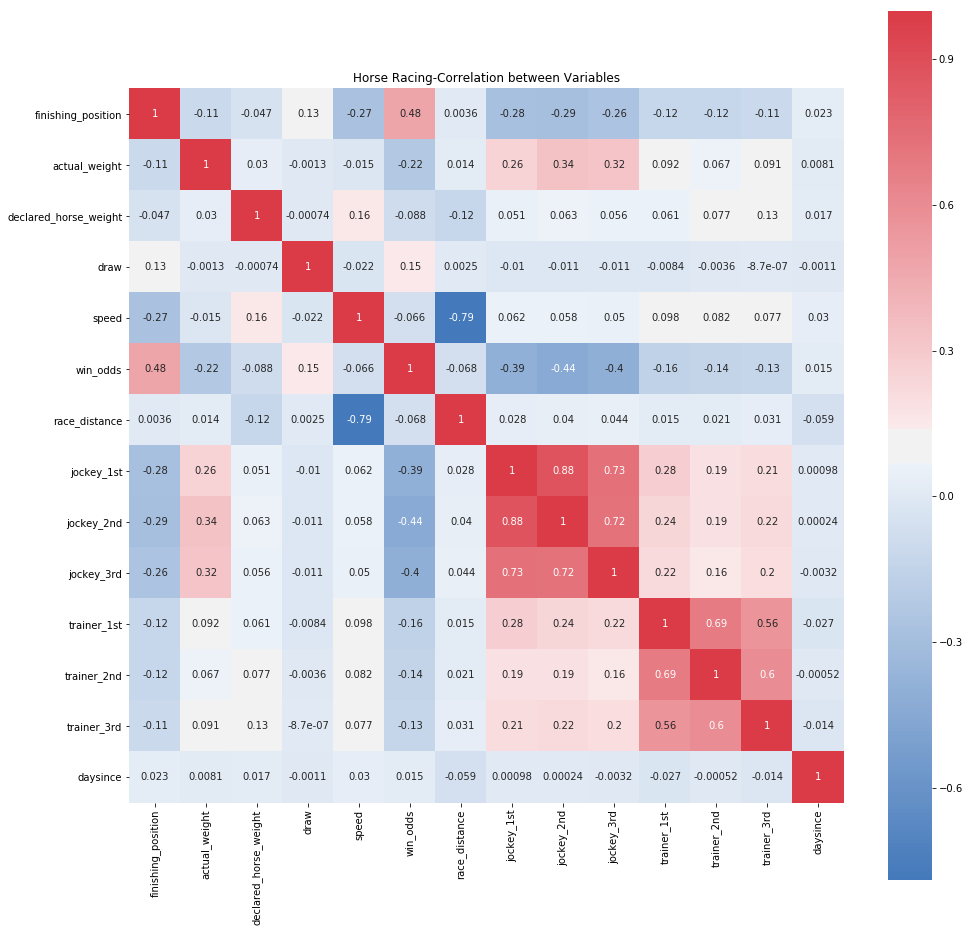

In [58]:
fig, ax = plt.subplots(figsize=(16,16))
fig = sns.heatmap(
    horsedf_new.corr(), 
    cmap = sns.diverging_palette(250,10,n=3,as_cmap = True ),
    square=True, 
    ax=ax, 
    annot = True, 
)
ax.set_title('Horse Racing-Correlation between Variables')
plt.savefig('img/heatmap.jpg', dpi=300)

We found that the correlation coefficient between race distance and finish time is 1. When correlation coefficient is 1, it implies that race distance and finish time have a perfect positive relationship. It makes sense because it takes more time for a longer distance, and vice versa.

As we can see the win_odds, jockey_1st, jockey_2nd and draw have higher negative/positive correlations(0.48, -0.28, -0.29, 0.13, 0.096) with the finishing_position. We can plot the  plotting pairwise relationships between these variables.

### Pairwise Relationships Between Variables

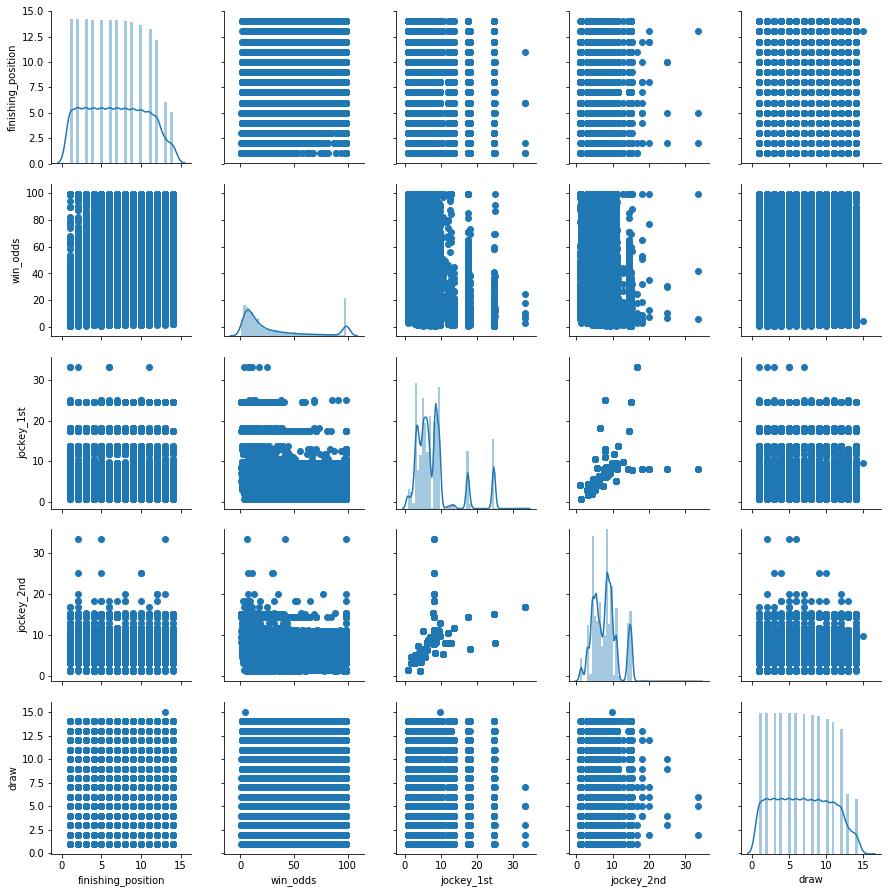

In [37]:
horsedf_plot=horsedf_new.loc[:,["finishing_position","win_odds", "jockey_1st", "jockey_2nd", "draw"]]

g = sns.PairGrid(horsedf_plot)
g = g.map_diag(sns.distplot)
g = g.map_offdiag(plt.scatter)
plt.savefig('img/Pairwise-Relationships.jpg', dpi=300)

### Separate Plots High Correlations Variables vs Finishing Position and Win (Finishing Position =1)

#### Plot of Win Odds vs Finishing Position 


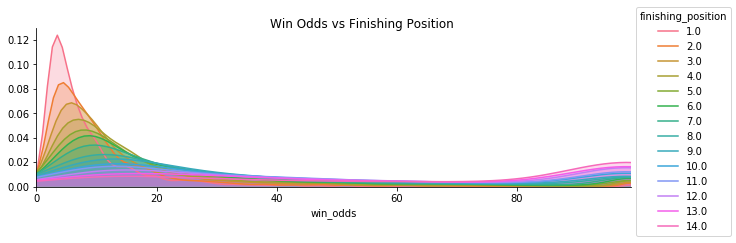

In [51]:
facet = sns.FacetGrid(horsedf_new, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'win_odds', shade= True)
facet.set(xlim=(0, horsedf_new["win_odds"].max()))
facet.add_legend()
facet.fig.suptitle('Win Odds vs Finishing Position')
plt.savefig('img/Win-Odds-vs-Finishing-Position.jpg', dpi=300)

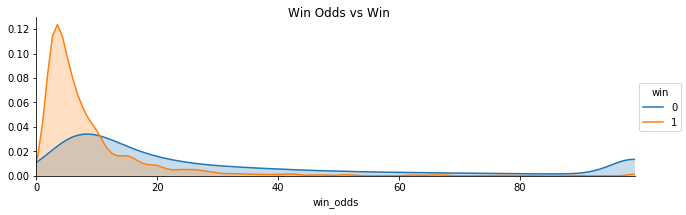

In [52]:
facet = sns.FacetGrid(horsedf, hue="win", aspect=3)
facet.map(sns.kdeplot, 'win_odds', shade= True)
facet.set(xlim=(0, horsedf_new["win_odds"].max()))
facet.add_legend()
facet.fig.suptitle('Win Odds vs Win')
plt.savefig('img/Win-Odds-vs-Win.jpg', dpi=300)

As we can see from the graphs above, it shows that win odds less than 15 have higher rates of a good finishing position, especially when finishing positions 1. It implies the lower the win odds, the higher the chane of winning.


#### Plot of Draw vs Finishing Position 
Draw of a horse decides in which individual stall a horse is placed. The smaller the draw number, the closer the horse is to the inside rail, it means smaller draw numbers has an slight advantage over larger draw numbers since a shorter distance to be covered at the turns.

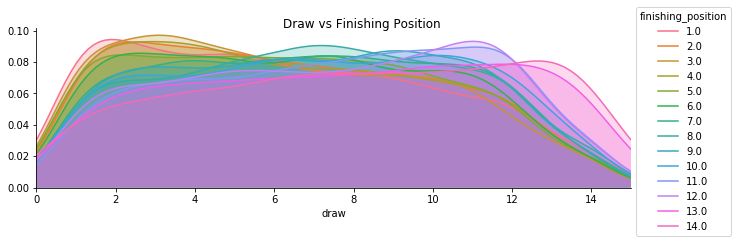

In [50]:
facet = sns.FacetGrid(horsedf_new, hue="finishing_position", aspect=3)
facet.map(sns.kdeplot, 'draw', shade= True)
facet.set(xlim=(0, horsedf_new["draw"].max()))
facet.add_legend()
facet.fig.suptitle('Draw vs Finishing Position')
plt.savefig('img/Draw-vs-Finishing-Position.jpg', dpi=300)

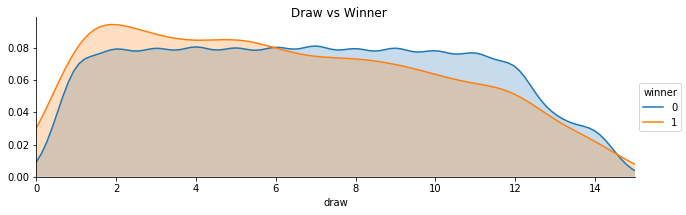

In [53]:
facet = sns.FacetGrid(horsedf, hue="winner", aspect=3)
facet.map(sns.kdeplot, 'draw', shade= True)
facet.set(xlim=(0, horsedf_new["draw"].max()))
facet.add_legend()
facet.fig.suptitle('Draw vs Winner')
plt.savefig('img/Draw-vs-Winner.jpg', dpi=300)

As we can see from the graphs above, it proved draw numbers smaller than 6 has an advantage over draw numbers larger than 6. And the smaller the draw number, the larger the advantage.

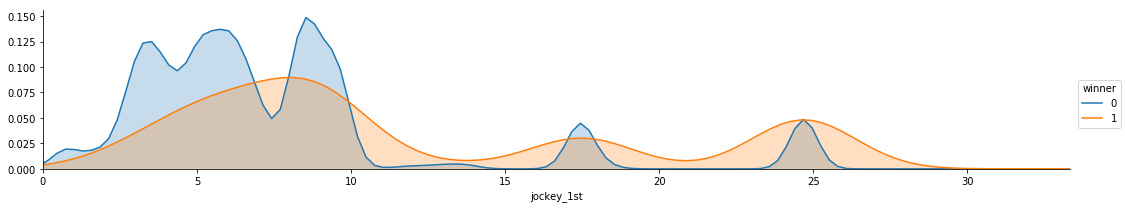

In [54]:
facet = sns.FacetGrid(horsedf, hue="winner", aspect=5)
facet.map(sns.kdeplot, 'jockey_1st', shade= True)
facet.set(xlim=(0, horsedf_new["jockey_1st"].max()))
facet.add_legend()


In [ ]:
the drop between 5 and 10 causes by an outlier

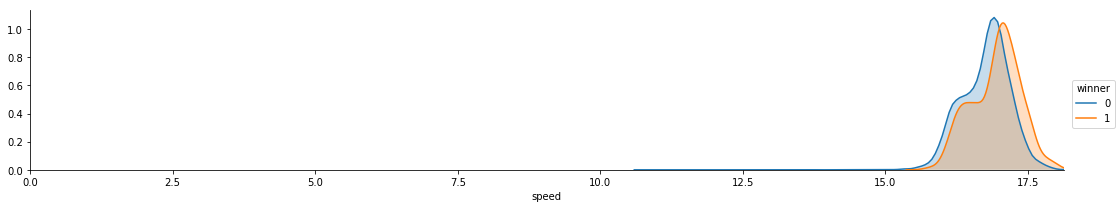

In [59]:
facet = sns.FacetGrid(horsedf, hue="winner", aspect=5)
facet.map(sns.kdeplot, 'speed', shade= True)
facet.set(xlim=(0, horsedf_new["speed"].max()))
facet.add_legend()
